In [271]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [272]:
df = pd.read_csv("../data/processed/job_market_data.csv")
df2 = pd.read_csv("../data/processed/job_market_clean_looser.csv")

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45241 entries, 0 to 45240
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            45220 non-null  object 
 1   Location         45217 non-null  object 
 2   Company          37716 non-null  object 
 3   Job_Type         21084 non-null  object 
 4   Salary           24556 non-null  object 
 5   Description      22366 non-null  object 
 6   source           45241 non-null  object 
 7   job_description  14862 non-null  object 
 8   Unnamed: 0       120 non-null    float64
dtypes: float64(1), object(8)
memory usage: 3.1+ MB


In [274]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3843 entries, 0 to 3842
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            3842 non-null   object
 1   Location         3841 non-null   object
 2   Company          3004 non-null   object
 3   Job_Type         1939 non-null   object
 4   Salary           1855 non-null   object
 5   Description      838 non-null    object
 6   source           3843 non-null   object
 7   job_description  2529 non-null   object
dtypes: object(8)
memory usage: 240.3+ KB


In [275]:
df.head()

,Title,Location,Company,Job_Type,Salary,Description,source,job_description,Unnamed: 0
0,Cybersecurity Systems Engineer,"Des Plaines, IL","Kranze Technology Solutions, Inc",Full-time,NaN,NaN,df_jobs,NaN,NaN
1,Staff Software Engineer,"Skokie, IL",Jobot,Full-time,$130K - $190K / yr,NaN,df_jobs,NaN,NaN
2,Software Development Team Lead,"Burr Ridge, IL","Uline, Inc.",Full-time,NaN,NaN,df_jobs,NaN,NaN
3,Lead Software Engineer - Full Stack - Java/Rea...,"Chicago, IL",JPMorganChase,Full-time,NaN,NaN,df_jobs,NaN,NaN
4,CNC Manufacturing Engineer,"Chicago, IL",Aegis Worldwide,Full-time,$90K - $105K / yr,NaN,df_jobs,NaN,NaN


## Univariate Analysis

- Most Common Job Titles: Frequency count of job titles.

- Top Hiring Companies: Bar chart of companies with the most listings.

- Job Types Distribution: Pie or bar chart showing proportions of full-time, part-time, etc.

- Salary Value Range: Clean the Salary column to extract numeric data, then plot distributions.

In [276]:
top_titles = df['Title'].value_counts().nlargest(10)
top_titles

Title
Senior Software Engineer                2566
Software Engineer                       1328
Full Stack Developer                     652
Full Stack Engineer                      528
Web Developer                            526
Data Engineer                            516
Software Developer                       421
Software Development Team Lead - Web     398
Founding Software Engineer               387
DevOps Software Engineer Intern          324
Name: count, dtype: int64

In [277]:
top_companies = df['Company'].value_counts().nlargest(10)
top_companies

Company
Uline, Inc.                         402
Kranze Technology Solutions, Inc    380
Motion Recruitment Partners, LLC    346
Catalyst Consulting Group, Inc.     338
ESPO Corporation                    330
Georgia IT Inc                      280
Avani Technology Solutions, Inc.    276
Havensight Consulting Group, LLC    270
Sterling Engineering                270
Metasys Technologies                266
Name: count, dtype: int64

In [278]:
job_type_counts = df['Job_Type'].value_counts()
job_type_counts

Job_Type
Full-time                19733
Part-time                  547
unknown                    450
Contract                   152
Contract | Freelance       128
Part-time | Full-time       30
Seasonal | Internship       20
Permanent | Full-time       18
Permanent                    4
Full-time | Contract         2
Name: count, dtype: int64

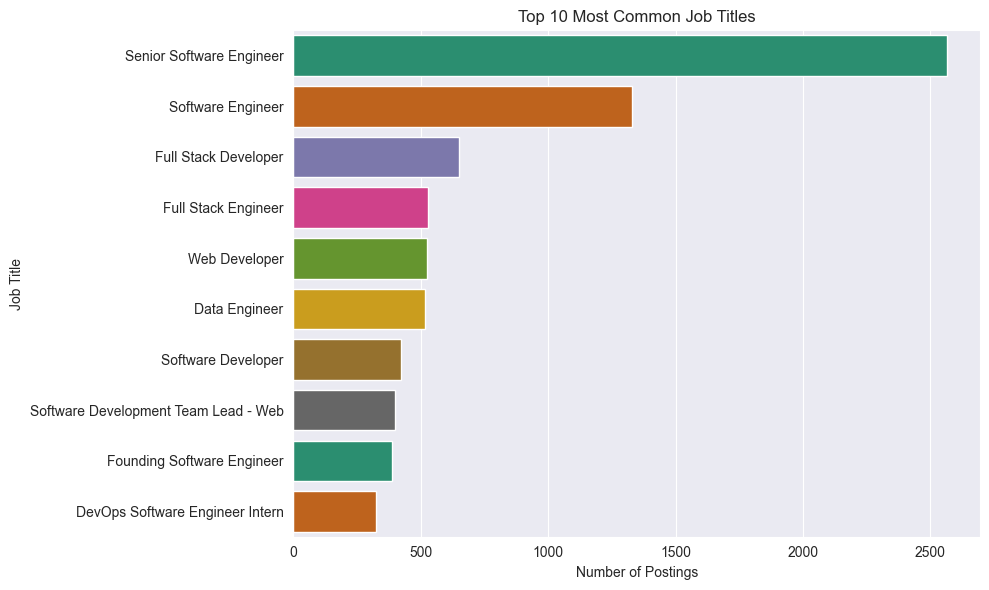

In [279]:
# Create a DataFrame from the top_titles Series
top_titles_df = top_titles.reset_index()
top_titles_df.columns = ['Job_Title', 'Count']

# Plot using Seaborn with hue for color assignment
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Count',
    y='Job_Title',
    hue='Job_Title',
    data=top_titles_df,
    palette='Dark2',
    dodge=False,
    legend=False
)
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Number of Postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()

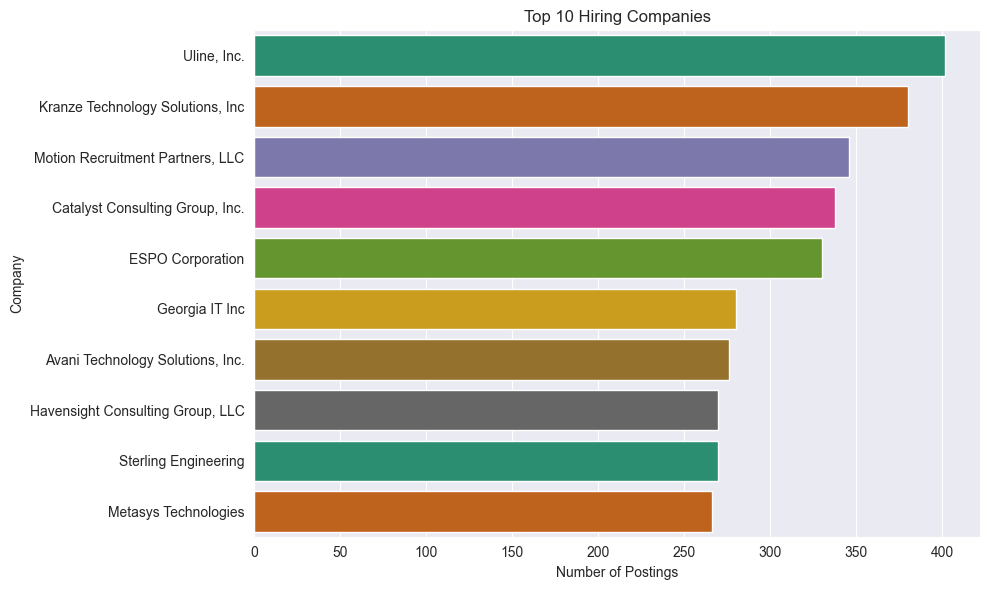

In [280]:
# Create a DataFrame from the top_companies Series
top_companies_df = top_companies.reset_index()
top_companies_df.columns = ['Company', 'Count']

# Plot using Seaborn with hue for color assignment
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Count',
    y='Company',
    hue='Company',
    data=top_companies_df,
    palette='Dark2',
    dodge=False,
    legend=False
)
plt.title('Top 10 Hiring Companies')
plt.xlabel('Number of Postings')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

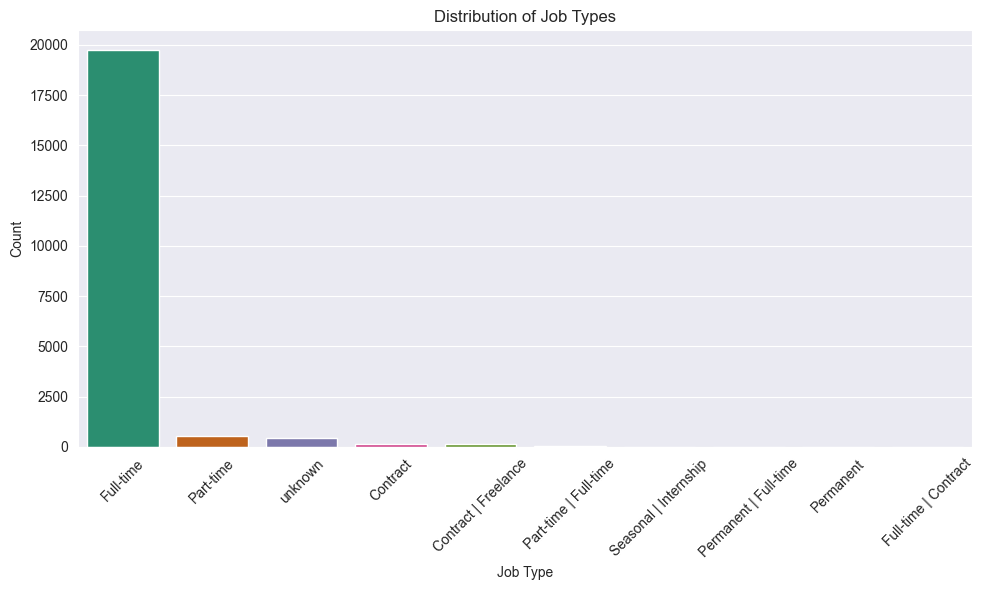

In [281]:
# Create a DataFrame from the job_type_counts Series
job_type_df = job_type_counts.reset_index()
job_type_df.columns = ['Job_Type', 'Count']

# Plot using Seaborn with hue for color assignment
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Job_Type',
    y='Count',
    hue='Job_Type',
    data=job_type_df,
    palette='Dark2',
    dodge=False,
    legend=False
)
plt.title('Distribution of Job Types')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Location-Based Analysis

- Top Cities or States for Jobs: Most listings by city or state.

- Job Types by Location: How job type distribution varies by region.

In [282]:
# Get the top 10 most common job locations
top_locations = df['Location'].value_counts().nlargest(10)

In [283]:
# Create a DataFrame for Seaborn
top_locations_df = top_locations.reset_index()
top_locations_df.columns = ['Location', 'Count']

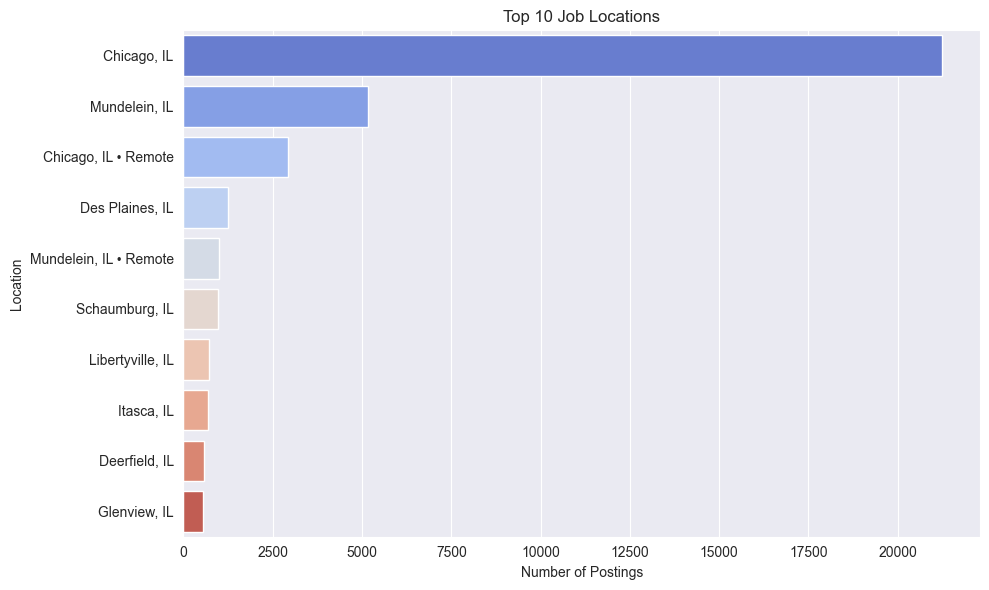

In [284]:
# Re-plot without the invalid `legend` argument
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Count',
    y='Location',
    hue='Location',
    data=top_locations_df,
    palette='coolwarm',
    dodge=False
)
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Postings')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

In [285]:
# Drop rows with missing Location, Job_Type, or Company
filtered_df = df.dropna(subset=['Location', 'Job_Type', 'Company'])

In [286]:
# Get the top 5 locations
top_5_locations = filtered_df['Location'].value_counts().nlargest(5).index
subset_df = filtered_df[filtered_df['Location'].isin(top_5_locations)]

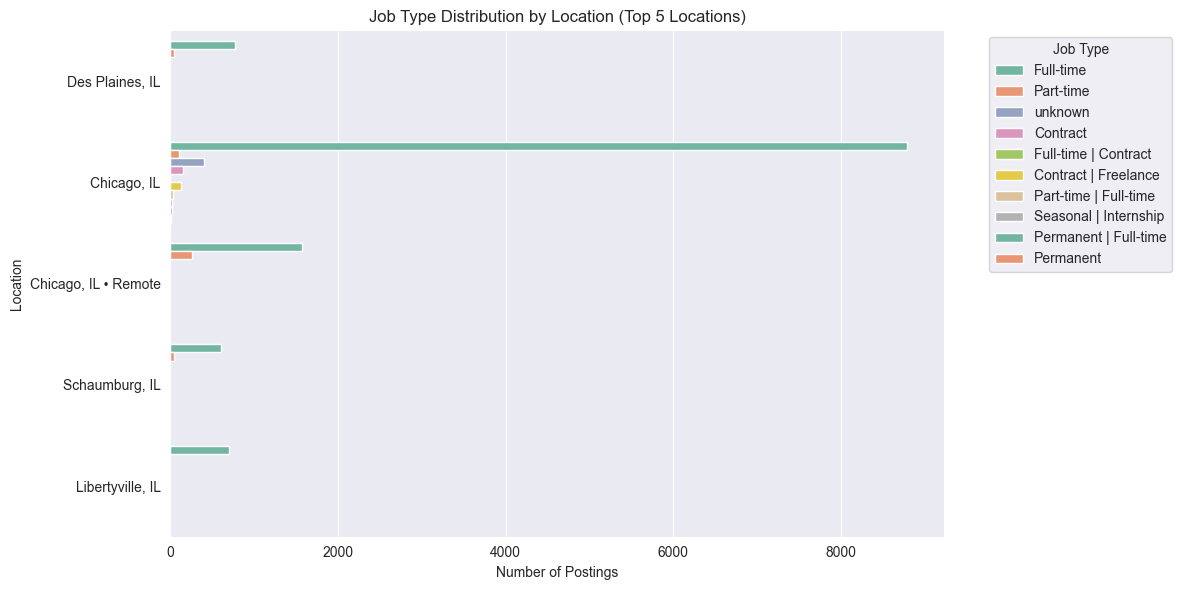

In [287]:
# --- Plot Job Type Distribution by Location ---
plt.figure(figsize=(12, 6))
sns.countplot(data=subset_df, y='Location', hue='Job_Type', palette='Set2')
plt.title('Job Type Distribution by Location (Top 5 Locations)')
plt.xlabel('Number of Postings')
plt.ylabel('Location')
plt.legend(title='Job Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [288]:
# --- Plot Top Companies by Location ---
# Count company listings within top locations
top_companies_by_location = (
    subset_df.groupby(['Location', 'Company'])
    .size()
    .reset_index(name='Count')
    .sort_values(['Location', 'Count'], ascending=[True, False])
)

In [289]:
# Get the top 3 companies per location
top_3_companies_each_location = (
    top_companies_by_location.groupby('Location')
    .head(3)
    .reset_index(drop=True)
)

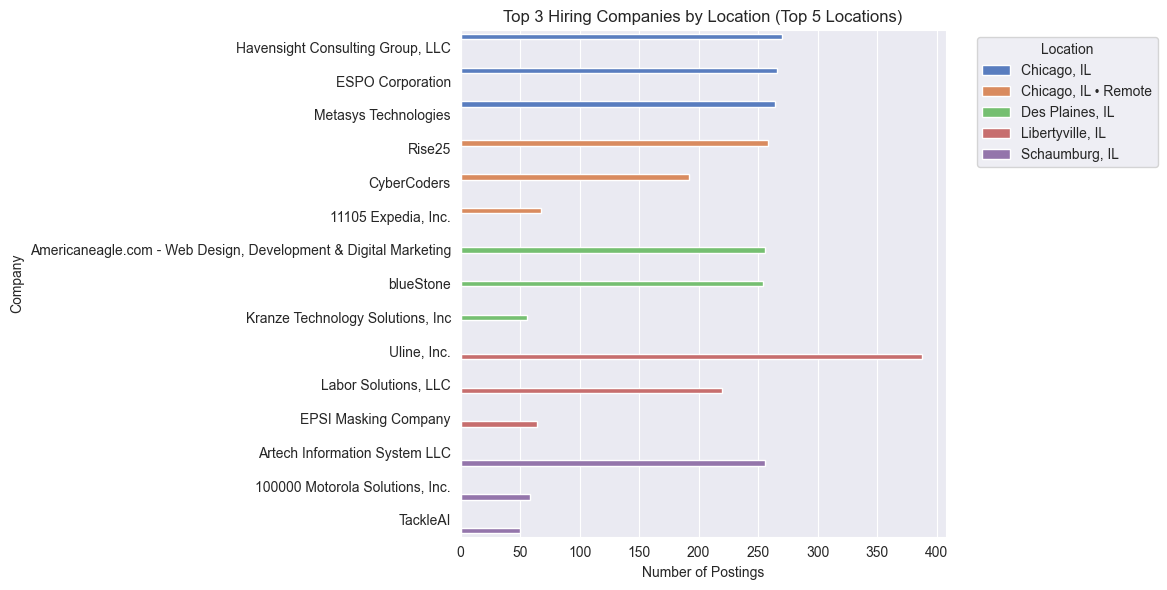

In [290]:
# Plot top companies by location
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_3_companies_each_location,
    x='Count',
    y='Company',
    hue='Location',
    dodge=True,
    palette='muted'
)
plt.title('Top 3 Hiring Companies by Location (Top 5 Locations)')
plt.xlabel('Number of Postings')
plt.ylabel('Company')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Salary Insights

- Salary vs Job Type: Average or median salary grouped by job type.

- Salary by Company: Identify companies offering the highest median salaries.

- Salary Distribution: Histogram or boxplot (after cleaning and parsing salary values).

In [291]:
df

,Title,Location,Company,Job_Type,Salary,Description,source,job_description,Unnamed: 0
0,Cybersecurity Systems Engineer,"Des Plaines, IL","Kranze Technology Solutions, Inc",Full-time,NaN,NaN,df_jobs,NaN,NaN
1,Staff Software Engineer,"Skokie, IL",Jobot,Full-time,$130K - $190K / yr,NaN,df_jobs,NaN,NaN
2,Software Development Team Lead,"Burr Ridge, IL","Uline, Inc.",Full-time,NaN,NaN,df_jobs,NaN,NaN
3,Lead Software Engineer - Full Stack - Java/Rea...,"Chicago, IL",JPMorganChase,Full-time,NaN,NaN,df_jobs,NaN,NaN
4,CNC Manufacturing Engineer,"Chicago, IL",Aegis Worldwide,Full-time,$90K - $105K / yr,NaN,df_jobs,NaN,NaN
...,...,...,...,...,...,...,...,...,...
45236,Technical Projet Manager (AWS DevOps),"Chicago, IL",ProIT Inc.,Contract,$55 - $60 an hour,NaN,job_market,NaN,NaN
45237,Sr Manager -IT App Dev Fuel Management,"Chicago, IL",United Airlines,Full-time,"$137,275 - $187,000 a year",NaN,job_market,NaN,NaN
45238,Senior DevSecOps Engineer/RPA Senior Product E...,"Chicago, IL","Professional Solutions Delivered, LLC",unknown,"$125,000 - $140,000 a year",NaN,job_market,NaN,NaN
45239,"VP, AWS Cloud Architect","Chicago, IL",Synchrony,unknown,"$130,000 - $210,000 a year",NaN,job_market,NaN,NaN


In [292]:
df_salary_clean = df.dropna(subset=['Salary']).copy()

In [293]:
import re

def extract_salary_range(s):
    if pd.isna(s):
        return pd.Series([None, None])

    s_clean = s.replace('$', '').replace(',', '').lower()
    match = re.findall(r'(\d+(?:\.\d+)?)([kKmM]?)', s_clean)

    if not match:
        return pd.Series([None, None])

    values = []
    for val, suffix in match:
        num = float(val)
        if suffix == 'k':
            num *= 1_000
        elif suffix == 'm':
            num *= 1_000_000
        values.append(num)

    if len(values) == 1:
        return pd.Series([values[0], values[0]])
    elif len(values) >= 2:
        return pd.Series([min(values[:2]), max(values[:2])])
    else:
        return pd.Series([None, None])

In [294]:
df_salary_clean[['Min_Salary', 'Max_Salary']] = df_salary_clean['Salary'].apply(extract_salary_range)
df_salary_clean

,Title,Location,Company,Job_Type,Salary,Description,source,job_description,Unnamed: 0,Min_Salary,Max_Salary
1,Staff Software Engineer,"Skokie, IL",Jobot,Full-time,$130K - $190K / yr,NaN,df_jobs,NaN,NaN,130000.0,190000.0
4,CNC Manufacturing Engineer,"Chicago, IL",Aegis Worldwide,Full-time,$90K - $105K / yr,NaN,df_jobs,NaN,NaN,90000.0,105000.0
7,Coordinate Measuring Machine Programmer,"Skokie, IL",OPW,Full-time,$28 - $37 / hr,NaN,df_jobs,NaN,NaN,28.0,37.0
8,CNC 3D Programmer,"Chicago, IL","Mercury Plastics, Inc",Full-time,$28 - $30 / hr,NaN,df_jobs,NaN,NaN,28.0,30.0
9,Structural Engineer,"Chicago, IL",Mueller and Associates Consulting LLC,Full-time,$65K - $85K / yr,NaN,df_jobs,NaN,NaN,65000.0,85000.0
...,...,...,...,...,...,...,...,...,...,...,...
45236,Technical Projet Manager (AWS DevOps),"Chicago, IL",ProIT Inc.,Contract,$55 - $60 an hour,NaN,job_market,NaN,NaN,55.0,60.0
45237,Sr Manager -IT App Dev Fuel Management,"Chicago, IL",United Airlines,Full-time,"$137,275 - $187,000 a year",NaN,job_market,NaN,NaN,137275.0,187000.0
45238,Senior DevSecOps Engineer/RPA Senior Product E...,"Chicago, IL","Professional Solutions Delivered, LLC",unknown,"$125,000 - $140,000 a year",NaN,job_market,NaN,NaN,125000.0,140000.0
45239,"VP, AWS Cloud Architect","Chicago, IL",Synchrony,unknown,"$130,000 - $210,000 a year",NaN,job_market,NaN,NaN,130000.0,210000.0


In [295]:
def normalize_salary(value):
    if pd.isna(value):
        return None
    try:
        # Count number of digits before the decimal point
        digits = len(str(int(value)))
        if digits <= 3:
            return value * 2080  # Convert hourly to annual
        return value  # Already annual
    except:
        return None

In [296]:
df_salary_clean['Min_Salary'] = df_salary_clean['Min_Salary'].apply(normalize_salary)
df_salary_clean['Max_Salary'] = df_salary_clean['Max_Salary'].apply(normalize_salary)

In [297]:
df_salary_clean['Avg_Salary'] = df_salary_clean[['Min_Salary', 'Max_Salary']].mean(axis=1)

In [298]:
df_salary_clean

,Title,Location,Company,Job_Type,Salary,Description,source,job_description,Unnamed: 0,Min_Salary,Max_Salary,Avg_Salary
1,Staff Software Engineer,"Skokie, IL",Jobot,Full-time,$130K - $190K / yr,NaN,df_jobs,NaN,NaN,130000.0,190000.0,160000.0
4,CNC Manufacturing Engineer,"Chicago, IL",Aegis Worldwide,Full-time,$90K - $105K / yr,NaN,df_jobs,NaN,NaN,90000.0,105000.0,97500.0
7,Coordinate Measuring Machine Programmer,"Skokie, IL",OPW,Full-time,$28 - $37 / hr,NaN,df_jobs,NaN,NaN,58240.0,76960.0,67600.0
8,CNC 3D Programmer,"Chicago, IL","Mercury Plastics, Inc",Full-time,$28 - $30 / hr,NaN,df_jobs,NaN,NaN,58240.0,62400.0,60320.0
9,Structural Engineer,"Chicago, IL",Mueller and Associates Consulting LLC,Full-time,$65K - $85K / yr,NaN,df_jobs,NaN,NaN,65000.0,85000.0,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45236,Technical Projet Manager (AWS DevOps),"Chicago, IL",ProIT Inc.,Contract,$55 - $60 an hour,NaN,job_market,NaN,NaN,114400.0,124800.0,119600.0
45237,Sr Manager -IT App Dev Fuel Management,"Chicago, IL",United Airlines,Full-time,"$137,275 - $187,000 a year",NaN,job_market,NaN,NaN,137275.0,187000.0,162137.5
45238,Senior DevSecOps Engineer/RPA Senior Product E...,"Chicago, IL","Professional Solutions Delivered, LLC",unknown,"$125,000 - $140,000 a year",NaN,job_market,NaN,NaN,125000.0,140000.0,132500.0
45239,"VP, AWS Cloud Architect","Chicago, IL",Synchrony,unknown,"$130,000 - $210,000 a year",NaN,job_market,NaN,NaN,130000.0,210000.0,170000.0


In [299]:
df_salary_clean = df_salary_clean[df_salary_clean['Avg_Salary'] != 0]

In [300]:
df_salary_clean

,Title,Location,Company,Job_Type,Salary,Description,source,job_description,Unnamed: 0,Min_Salary,Max_Salary,Avg_Salary
1,Staff Software Engineer,"Skokie, IL",Jobot,Full-time,$130K - $190K / yr,NaN,df_jobs,NaN,NaN,130000.0,190000.0,160000.0
4,CNC Manufacturing Engineer,"Chicago, IL",Aegis Worldwide,Full-time,$90K - $105K / yr,NaN,df_jobs,NaN,NaN,90000.0,105000.0,97500.0
7,Coordinate Measuring Machine Programmer,"Skokie, IL",OPW,Full-time,$28 - $37 / hr,NaN,df_jobs,NaN,NaN,58240.0,76960.0,67600.0
8,CNC 3D Programmer,"Chicago, IL","Mercury Plastics, Inc",Full-time,$28 - $30 / hr,NaN,df_jobs,NaN,NaN,58240.0,62400.0,60320.0
9,Structural Engineer,"Chicago, IL",Mueller and Associates Consulting LLC,Full-time,$65K - $85K / yr,NaN,df_jobs,NaN,NaN,65000.0,85000.0,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45236,Technical Projet Manager (AWS DevOps),"Chicago, IL",ProIT Inc.,Contract,$55 - $60 an hour,NaN,job_market,NaN,NaN,114400.0,124800.0,119600.0
45237,Sr Manager -IT App Dev Fuel Management,"Chicago, IL",United Airlines,Full-time,"$137,275 - $187,000 a year",NaN,job_market,NaN,NaN,137275.0,187000.0,162137.5
45238,Senior DevSecOps Engineer/RPA Senior Product E...,"Chicago, IL","Professional Solutions Delivered, LLC",unknown,"$125,000 - $140,000 a year",NaN,job_market,NaN,NaN,125000.0,140000.0,132500.0
45239,"VP, AWS Cloud Architect","Chicago, IL",Synchrony,unknown,"$130,000 - $210,000 a year",NaN,job_market,NaN,NaN,130000.0,210000.0,170000.0


In [301]:
# Summary stats
df_salary_clean['Avg_Salary'].describe()

count     24379.000000
mean     127821.752414
std       67005.682265
min        2100.000000
25%       85500.000000
50%      115000.000000
75%      147500.000000
max      700000.000000
Name: Avg_Salary, dtype: float64

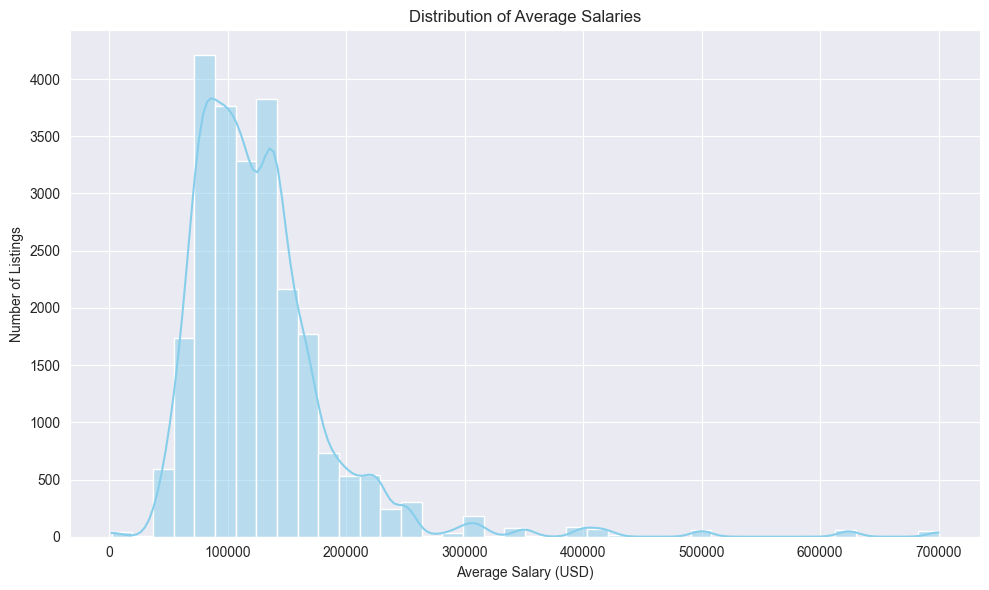

In [302]:
# Plot salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_salary_clean['Avg_Salary'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Average Salaries')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

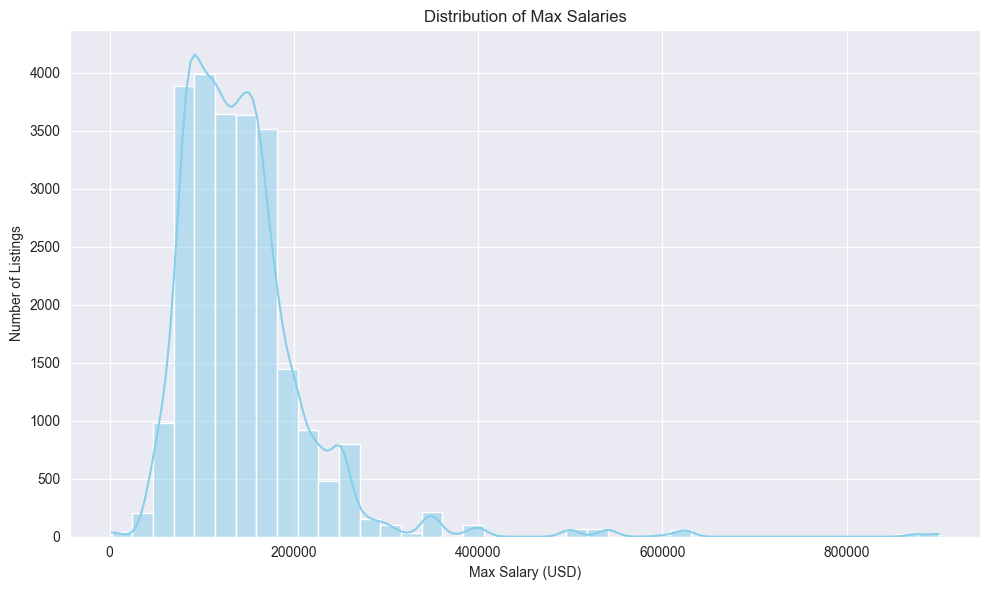

In [303]:
# Plot salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_salary_clean['Max_Salary'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Max Salaries')
plt.xlabel('Max Salary (USD)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

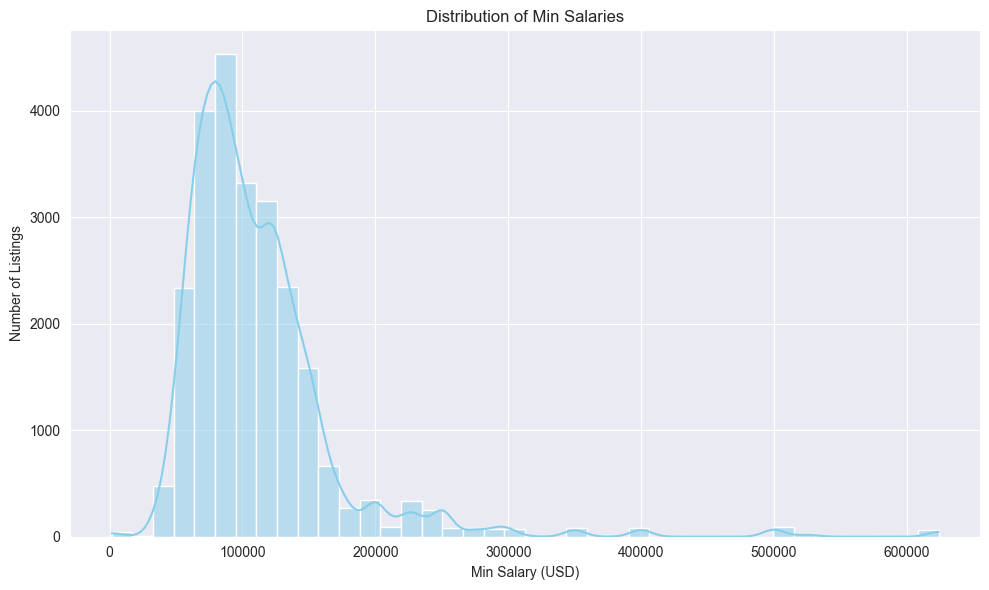

In [304]:
# Plot salary distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_salary_clean['Min_Salary'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Min Salaries')
plt.xlabel('Min Salary (USD)')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

## Text Analysis (NLP Light)

- Keyword Frequency: Top terms in job_description or Description.

- Word Cloud: To visualize common requirements/skills.

- Sentiment Analysis: On job descriptions, to gauge tone or marketing style.

In [305]:
SKILL_VARIATIONS = {
    'python': {'python', 'python3', 'python 3', 'python programming'},
    'java': {'java', 'java programming', 'java development'},
    'javascript': {'javascript', 'js', 'ecmascript'},
    'typescript': {'typescript'},
    'c++': {'c++', 'cpp', 'c plus plus'},
    'c#': {'c#', 'c sharp', 'csharp'},
    'go': {'go', 'golang'},
    'r': {'r', 'r programming'},
    'react': {'react', 'reactjs', 'react.js'},
    'angular': {'angular', 'angularjs'},
    'django': {'django', 'django framework'},
    'flask': {'flask', 'flask framework'},
    'aws': {'aws', 'amazon web services'},
    'azure': {'azure', 'microsoft azure'},
    'gcp': {'gcp', 'google cloud'},
    'docker': {'docker', 'docker container'},
    'kubernetes': {'kubernetes', 'k8s'},
    'ci/cd': {'ci/cd', 'cicd'},
    'sql': {'sql', 'sql database'},
    'postgresql': {'postgresql', 'postgres'},
    'mongodb': {'mongodb', 'mongo'},
    'mysql': {'mysql', 'mysql database'},
    'redis': {'redis', 'redis cache'},
    'git': {'git', 'git version control'},
    'linux': {'linux', 'linux system'},
    'excel': {'excel', 'microsoft excel'},
    'api': {'api', 'rest api'},
    'tableau': {'tableau', 'tableau bi'},
    'power bi': {'power bi', 'powerbi'}
}

In [306]:
# Count occurrences of each skill (using all aliases)
keyword_counts = {}

for skill, variations in SKILL_VARIATIONS.items():
    pattern = '|'.join([re.escape(v) for v in variations])
    mask = df['Description'].str.contains(pattern, case=False, regex=True, na=False)
    keyword_counts[skill] = mask.sum()

manual_keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Skill', 'Mentions'])
manual_keyword_df = manual_keyword_df.sort_values(by='Mentions', ascending=False).reset_index(drop=True)

#### Disclaimer: Had to use excel to look at a rough estimate of how many times these programming languages were appearing in the description since they are hard to use regex.

In [307]:
manual_keyword_df.loc[manual_keyword_df['Skill'] == 'r', 'Mentions'] = 570
manual_keyword_df.loc[manual_keyword_df['Skill'] == 'go', 'Mentions'] = 4245

In [312]:
# Display the results
manual_keyword_df

,Skill,Mentions
0,r,570
1,go,4245
2,excel,8102
3,api,6378
4,sql,5878
5,java,5287
6,python,5032
7,javascript,4846
8,aws,4561
9,git,4294


In [315]:
manual_keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Skill', 'Mentions'])
manual_keyword_df

,Skill,Mentions
0,python,5032
1,java,5287
2,javascript,4846
3,typescript,1817
4,c++,1561
5,c#,2419
6,go,12090
7,r,22366
8,react,3198
9,angular,1192


In [316]:
CATEGORY_MAP = {
    # Programming Languages
    'python': 'Programming Language',
    'java': 'Programming Language',
    'javascript': 'Programming Language',
    'typescript': 'Programming Language',
    'c++': 'Programming Language',
    'c#': 'Programming Language',
    'go': 'Programming Language',
    'r': 'Programming Language',
    'ruby': 'Programming Language',
    'scala': 'Programming Language',
    'bash': 'Programming Language',

    # Frameworks & Libraries
    'react': 'Framework',
    'angular': 'Framework',
    'vue': 'Framework',
    'django': 'Framework',
    'flask': 'Framework',
    'spring': 'Framework',
    'fastapi': 'Framework',
    'express': 'Framework',
    'node': 'Framework',
    'nextjs': 'Framework',
    'keras': 'Framework',
    'tensorflow': 'Framework',
    'pytorch': 'Framework',
    'scikit-learn': 'Framework',
    'sklearn': 'Framework',
    'xgboost': 'Framework',
    'lightgbm': 'Framework',

    # Cloud
    'aws': 'Cloud',
    'azure': 'Cloud',
    'gcp': 'Cloud',
    'google cloud': 'Cloud',
    'amazon web services': 'Cloud',

    # DevOps & Infrastructure
    'docker': 'DevOps',
    'kubernetes': 'DevOps',
    'git': 'DevOps',
    'ci/cd': 'DevOps',
    'jenkins': 'DevOps',
    'terraform': 'DevOps',
    'ansible': 'DevOps',

    # Databases
    'sql': 'Database',
    'mysql': 'Database',
    'postgresql': 'Database',
    'postgres': 'Database',
    'mongodb': 'Database',
    'mongo': 'Database',
    'sqlite': 'Database',
    'redis': 'Database',
    'oracle': 'Database',

    # BI / Visualization Tools
    'tableau': 'BI Tool',
    'power bi': 'BI Tool',
    'excel': 'BI Tool',
    'looker': 'BI Tool',
    'qlik': 'BI Tool',

    # Other Tools & APIs
    'api': 'Other',
    'jira': 'Other',
    'confluence': 'Other',
    'airflow': 'Other',
    'linux': 'Other',
    'windows': 'Other',
    'jira': 'Other',
    'bitbucket': 'Other',
    'dvc': 'Other',
    'mlflow': 'Other',
    'kubeflow': 'Other',
}


In [317]:
manual_keyword_df['Category'] = manual_keyword_df['Skill'].map(CATEGORY_MAP).fillna('Other')

In [318]:
category_summary = manual_keyword_df.groupby('Category').agg(
    Skills_Count=('Skill', 'count'),
    Total_Mentions=('Mentions', 'sum')
).sort_values(by='Total_Mentions', ascending=False)

print(category_summary)

                      Skills_Count  Total_Mentions
Category                                          
Programming Language             8           55418
DevOps                           4           11154
Cloud                            3           10759
BI Tool                          3           10011
Database                         5            8085
Other                            2            7970
Framework                        4            4733


In [319]:
manual_keyword_df['Category'] = manual_keyword_df['Skill'].map(CATEGORY_MAP).fillna('Other')

In [320]:
sorted_skills_by_category = manual_keyword_df.sort_values(['Category', 'Mentions'], ascending=[True, False])

In [321]:
sorted_skills_by_category[sorted_skills_by_category['Category'] == 'Programming Language']

,Skill,Mentions,Category
7,r,22366,Programming Language
6,go,12090,Programming Language
1,java,5287,Programming Language
0,python,5032,Programming Language
2,javascript,4846,Programming Language
5,c#,2419,Programming Language
3,typescript,1817,Programming Language
4,c++,1561,Programming Language


In [322]:
for category in sorted_skills_by_category['Category'].unique():
    print(f"\n📚 {category}")
    display(sorted_skills_by_category[sorted_skills_by_category['Category'] == category][['Skill', 'Mentions']])



📚 BI Tool


,Skill,Mentions
25,excel,8102
28,power bi,1263
27,tableau,646



📚 Cloud


,Skill,Mentions
12,aws,4561
13,azure,3999
14,gcp,2199



📚 Database


,Skill,Mentions
18,sql,5878
19,postgresql,859
21,mysql,815
20,mongodb,419
22,redis,114



📚 DevOps


,Skill,Mentions
23,git,4294
17,ci/cd,3439
16,kubernetes,2041
15,docker,1380



📚 Framework


,Skill,Mentions
8,react,3198
9,angular,1192
10,django,189
11,flask,154



📚 Other


,Skill,Mentions
26,api,6378
24,linux,1592



📚 Programming Language


,Skill,Mentions
7,r,22366
6,go,12090
1,java,5287
0,python,5032
2,javascript,4846
5,c#,2419
3,typescript,1817
4,c++,1561
